Overall Analysis

Two drugs, capomulin and ramicane, show promise as drug treatments. Mice treated with these drugs have far greater survival rate than those treated with a placebo. I would recommend focusing resources into pursuing these two options.

Tumors in mice treated by capomulin appear to be of relatively consistant density. Although weight of the individual mice, not including their tumors, is likely to be a large contributing factor to this measurement.

Data entry protocols should be reviewed, and measures implemented, to prevent duplicate data entrys from being submitted. Data on mouse g989 had to be removed from the study because of this.



In [46]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [47]:
# Read in the data 
mousedata_path = "Data\\Mouse_metadata.csv"
studydata_path = "Data\\Study_results.csv"
micedata = pd.read_csv(mousedata_path)
studydata = pd.read_csv(studydata_path)

## **Data Samples**

#### Mouse_metadata.csv

In [48]:
micedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


#### Study_results.csv

In [49]:
studydata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


#### To facilitate analysis, the two tables are merged. Unique information for each Mouse ID  is taken from the micedata table, and added to the to the studydata table.

In [50]:
rawdata = pd.merge(micedata,studydata, on="Mouse ID", how="right").rename(columns={"Timepoint": "Time (days)"})
display(rawdata)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Time (days),Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


## **Data Cleaning**

In [51]:
display(rawdata.describe()) # Verify ability to perform numeric operations on expected columns
display(rawdata.dtypes) # Verify data types are as expected
display(rawdata.count().to_frame()) #Check for blanks

,Age_months,Weight (g),Time (days),Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Time (days)             int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

,0
Mouse ID,1893
Drug Regimen,1893
Sex,1893
Age_months,1893
Weight (g),1893
Time (days),1893
Tumor Volume (mm3),1893
Metastatic Sites,1893


 ### Check for multiple values for each mouseID/timepoint combination
 #### Multiple duplicate entries are observed for mouse ID g989. 

In [52]:
(rawdata.copy()
              .groupby(["Mouse ID","Time (days)"])
              .agg({"Time (days)":"count"}).rename(columns = {"Time (days)":"Duplicates"}) # Column renamed to reflect new data meaining
              .sort_values("Duplicates",ascending = False) # Sorted to make the presence of duplicates readily visible
)

Duplicates
Mouse ID Time (days)            
g989     20                    2
         15                    2
         10                    2
         5                     2
         0                     2
...                          ...
i334     20                    1
         15                    1
         10                    1
         5                     1
z969     45                    1

[1888 rows x 1 columns]

####  We do not know which of these data represents true measurments. To ensure the accuracy of the study, All MouseID/timepoints combinations that are not unique will be deleted.

In [209]:
cleandata = rawdata.copy()[~rawdata["Mouse ID"].str.contains("g989")]
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Time (days),Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


## **Data Overview**

#### High level overview of tumor volume data

In [98]:
drugstats = (cleandata.copy().groupby("Drug Regimen") # Group the data by drug regimen
             .agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']}) # Return statistics on tumor volume
            )
drugstats.style.format("{:.2f}") # Improve the format of the output

## **Cohort Survival Rates**
### **Data Analysis**

In [99]:
drugmicecounts = (cleandata.copy().groupby(["Drug Regimen","Time (days)"]) # Group the data by timepoints for each drug regimen
                  .agg({"Mouse ID":'count'})# Return the number of mice alive at each timepoint
                  .unstack().T.droplevel(0,0) # Improve the format of the output
                 )
drugmicecounts

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Time (days),,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,13,23,18,16
30,22,16,17,18,15,15,12,23,17,15
35,22,14,12,17,15,14,9,21,15,14
40,21,14,10,15,15,12,9,20,12,14


### **Data Visualization**
#### Plotting survival rates using matplotlib

Text(0.5, 0, 'Time (days)')

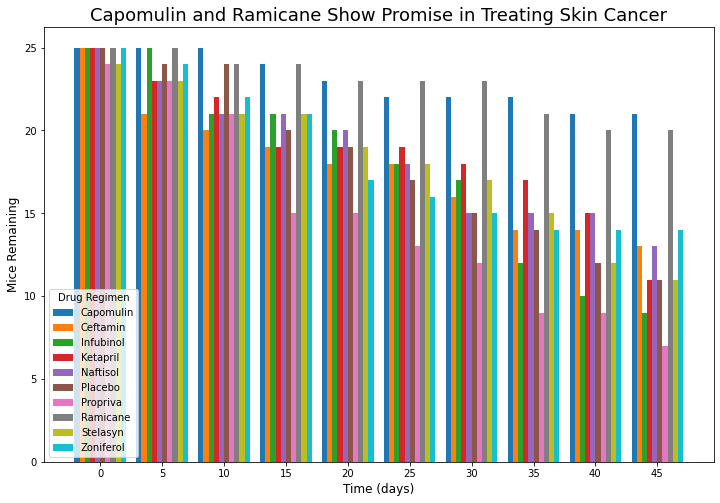

In [101]:
# Generation of a list to use for x-axis ticks
x2 = np.arange(len(drugmicecounts))*12+4

# Declare variable to use for column width
width = 1

# Generate a figure with a flexible number data inputs
fig1, ax = plt.subplots(figsize = (12,8))

# Select and plot each column of data, specifying the location to plot on the x-axis
plt.xticks(ticks =x2+4.5, labels = drugmicecounts.index,fontsize =10)
capomulinbar = ax.bar(x2, drugmicecounts["Capomulin"],width, label = 'Capomulin')
ceftaminbar = ax.bar(x2+1,drugmicecounts['Ceftamin'],width, label = 'Ceftamin')
infubinolbar = ax.bar(x2+2,drugmicecounts['Infubinol'],width, label = 'Infubinol')
ketaprilbar = ax.bar(x2+3,drugmicecounts['Ketapril'],width, label = 'Ketapril')
naftisolbar = ax.bar(x2+4,drugmicecounts['Naftisol'],width, label = 'Naftisol')
placebobar = ax.bar(x2+5,drugmicecounts['Placebo'],width, label = 'Placebo')
proprivabar = ax.bar(x2+6,drugmicecounts['Propriva'],width, label = "Propriva")
ramicanebar = ax.bar(x2+7,drugmicecounts['Ramicane'],width, label = 'Ramicane')
stelasynbar = ax.bar(x2+8,drugmicecounts['Stelasyn'],width, label = 'Stelasyn')
zoniferol= ax.bar(x2+9,drugmicecounts['Zoniferol'],width, label = 'Zoniferol')
leg = plt.legend(loc = "lower left", title = "Drug Regimen")
# improve formating
plt.title("Capomulin and Ramicane Show Promise in Treating Skin Cancer",fontsize=18)
plt.ylabel("Mice Remaining", fontsize =12)
plt.xlabel("Time (days)", fontsize =12)

#### Creating the same plot using pandas

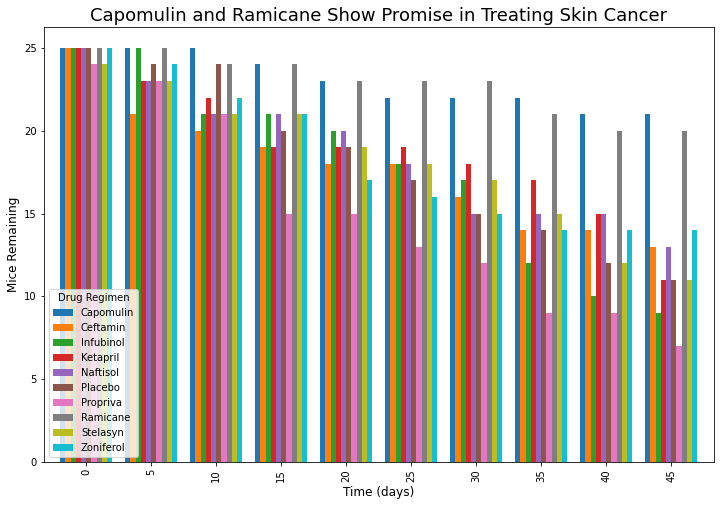

In [102]:
# Plot the entire dataframe as a bar chart
drugmicecounts.plot.bar(figsize = (12,8),width = 0.8)

# Improve formating
plt.title("Capomulin and Ramicane Show Promise in Treating Skin Cancer",fontsize=18)
plt.ylabel("Mice Remaining", fontsize =12)
plt.xlabel("Time (days)", fontsize =12)
plt.legend(loc = 'lower left', title = "Drug Regimen")

#### Alternate bar chart format that is much easier to follow

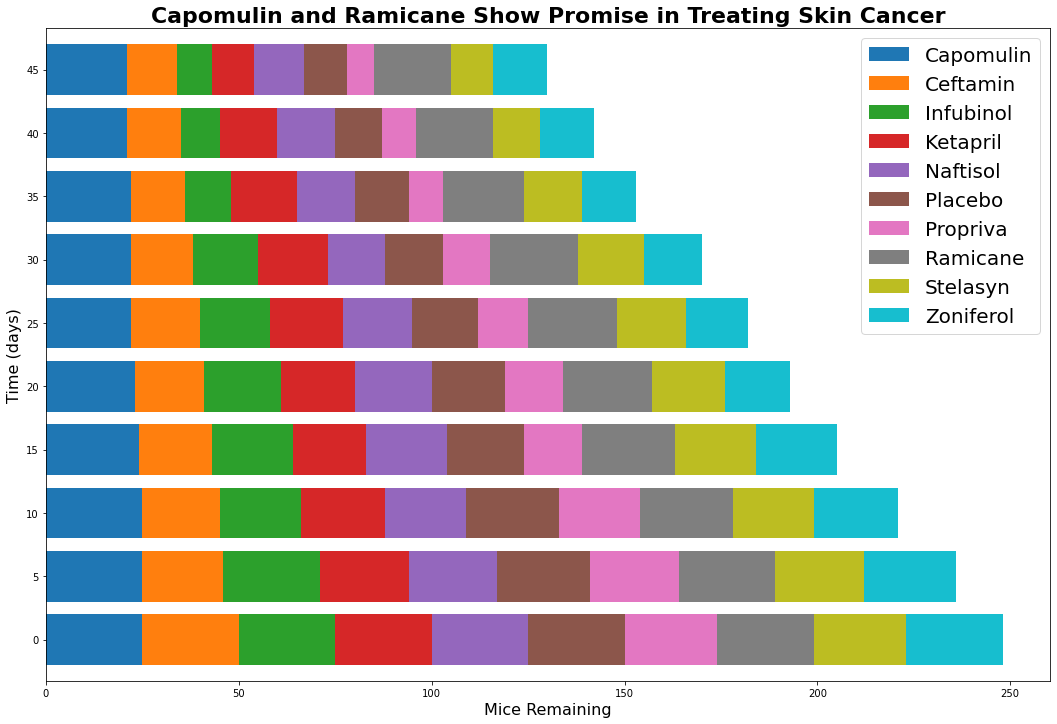

In [229]:
# Plot the entire data frame as a stacked horizontal bar chart
drugmicecounts.plot.barh(stacked = True,width =0.8,figsize = (18, 12))

# Improve formating
plt.title("Capomulin and Ramicane Show Promise in Treating Skin Cancer",fontsize=22, fontweight = 'bold')
plt.xlabel("Mice Remaining", fontsize =16)
plt.ylabel("Time (days)", fontsize =16)
plt.legend(prop = {'size': 20})

## **Number of Unique Mice in Each Cohort**

## **Data Analysis**

#### Determine the number of unique mouse ID's in each drug regimen

In [249]:
uniquemice = cleandata.copy().groupby('Drug Regimen').nunique()["Mouse ID"].to_frame().sort_values('Mouse ID', ascending = False)
display(uniquemice)

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Ramicane,25
Zoniferol,25
Propriva,24


### **Data Visualization**

#### Plot the data using matplotlib

Text(0, 0.5, 'Cohort Size')

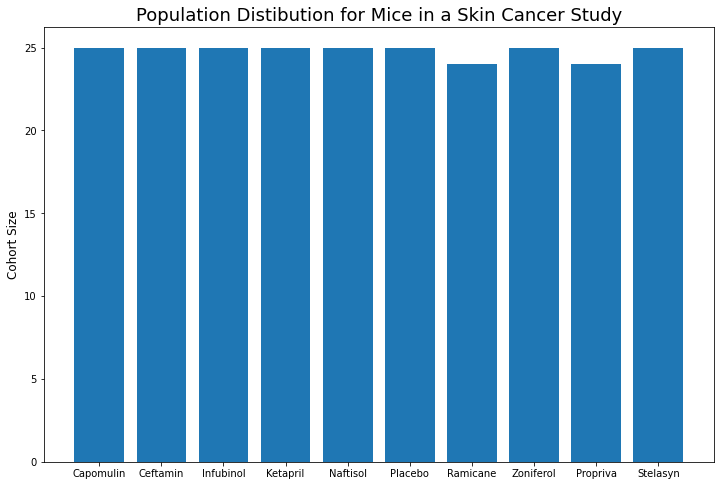

In [252]:
# Declare variable to use for column width
width = 0.8

# Generate a figure with a flexible number data inputs
fig1, ax = plt.subplots(figsize = (12,8))

# Select and plot each column of data, specifying the location to plot on the x-axis
plt.xticks(ticks =[1,2,3,4,5,6,7,8,9,10], labels = uniquemice.index,fontsize =10)
capomulinbar = ax.bar(1, uniquemice.T["Capomulin"],width, label = 'Capomulin',color = 'tab:blue')
ceftaminbar = ax.bar(2,uniquemice.T['Ceftamin'],width, label = 'Ceftamin',color = 'tab:blue')
infubinolbar = ax.bar(3,uniquemice.T['Infubinol'],width, label = 'Infubinol',color = 'tab:blue')
ketaprilbar = ax.bar(4,uniquemice.T['Ketapril'],width, label = 'Ketapril',color = 'tab:blue')
naftisolbar = ax.bar(5,uniquemice.T['Naftisol'],width, label = 'Naftisol',color = 'tab:blue')
placebobar = ax.bar(6,uniquemice.T['Placebo'],width, label = 'Placebo',color = 'tab:blue')
ramicanebar = ax.bar(8,uniquemice.T['Ramicane'],width, label = 'Ramicane',color = 'tab:blue')
zoniferol= ax.bar(10,uniquemice.T['Zoniferol'],width, label = 'Zoniferol',color = 'tab:blue')
proprivabar = ax.bar(7,uniquemice.T['Propriva'],width, label = "Propriva",color = 'tab:blue')
stelasynbar = ax.bar(9,uniquemice.T['Stelasyn'],width, label = 'Stelasyn',color = 'tab:blue')

# improve formating
plt.title("Population Distibution for Mice in a Skin Cancer Study",fontsize=18)
plt.ylabel("Cohort Size", fontsize =12)

#### The same chart created with pandas

Text(0.5, 0, '')

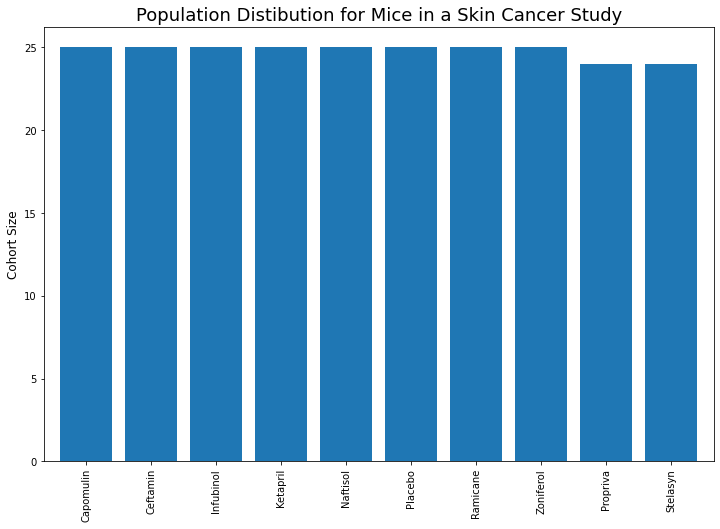

In [247]:
uniquemice.plot(kind = 'bar',figsize =(12,8), width = 0.8, legend = False)
plt.title("Population Distibution for Mice in a Skin Cancer Study",fontsize=18)
plt.ylabel("Cohort Size", fontsize =12)
plt.xlabel('')

## **Number of Measurements Taken for each Cohort**

### **Data Analysis**

In [236]:
cohortmeasurements = cleandata.copy().groupby("Drug Regimen").count()['Mouse ID'].to_frame()
display(cohortmeasurements)

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


### **Data Visualization**

Text(0, 0.5, 'Total Number of Unique Measurements')

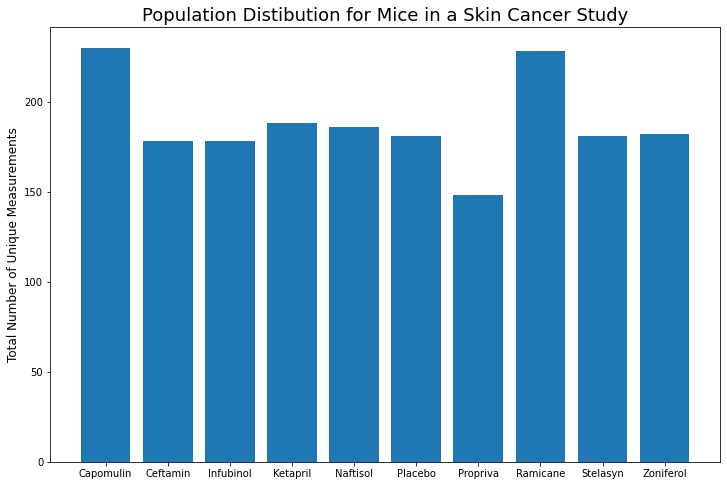

In [241]:
# Declare variable to use for column width
width = 0.8

# Generate a figure with a flexible number data inputs
fig1, ax = plt.subplots(figsize = (12,8))

# Select and plot each column of data, specifying the location to plot on the x-axis
plt.xticks(ticks =[1,2,3,4,5,6,7,8,9,10], labels = uniquemice.index,fontsize =10)
capomulinbar = ax.bar(1, cohortmeasurements.T["Capomulin"],width, label = 'Capomulin',color = 'tab:blue')
ceftaminbar = ax.bar(2, cohortmeasurements.T['Ceftamin'],width, label = 'Ceftamin',color = 'tab:blue')
infubinolbar = ax.bar(3, cohortmeasurements.T['Infubinol'],width, label = 'Infubinol',color = 'tab:blue')
ketaprilbar = ax.bar(4, cohortmeasurements.T['Ketapril'],width, label = 'Ketapril',color = 'tab:blue')
naftisolbar = ax.bar(5, cohortmeasurements.T['Naftisol'],width, label = 'Naftisol',color = 'tab:blue')
placebobar = ax.bar(6, cohortmeasurements.T['Placebo'],width, label = 'Placebo',color = 'tab:blue')
proprivabar = ax.bar(7, cohortmeasurements.T['Propriva'],width, label = "Propriva",color = 'tab:blue')
ramicanebar = ax.bar(8, cohortmeasurements.T['Ramicane'],width, label = 'Ramicane',color = 'tab:blue')
stelasynbar = ax.bar(9, cohortmeasurements.T['Stelasyn'],width, label = 'Stelasyn',color = 'tab:blue')
zoniferol= ax.bar(10, cohortmeasurements.T['Zoniferol'],width, label = 'Zoniferol',color = 'tab:blue')

# improve formating
plt.title("Population Distibution for Mice in a Skin Cancer Study",fontsize=18)
plt.ylabel("Total Number of Unique Measurements", fontsize =12)

## **Gender Demographics for Study Participants**

In [119]:
gendermice= cleandata.copy().groupby('Sex').nunique()["Mouse ID"]
gendermice

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

#### Pie chart generated using matplotlit 

([<matplotlib.patches.Wedge at 0x2d726c62640>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

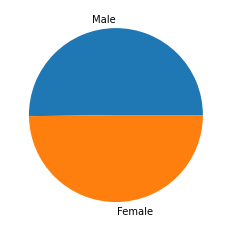

In [105]:
plt.pie(gendermice,labels =["Male","Female"])

#### Creating the same chart with pandas

<AxesSubplot:ylabel='Gender Demographic Across All Drug Regimens'>

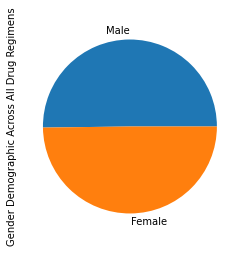

In [106]:
gendermice.plot(kind = "pie",ylabel="Gender Demographic Across All Drug Regimens")

## **Final Tumor Volume Comparison for the Top Four Drug Treatments**

### **Data Analysis**
#### Determination of the spread for each cohort

In [107]:
# Determine the last day a given mouse
mouselast = cleandata.copy().groupby(["Drug Regimen","Mouse ID"]).agg({"Time (days)":"last"})

# create functions to return 1st and 3rd quartiles, these will be used with .agg()
def q1(x):
    return x.quantile(.25)
def q3(x):
    return x.quantile(.75)

# Use the mouselast data table to pull the final tumor volume for each mouse from the raw data
finalvolume = pd.merge(mouselast,cleandata,on = ["Mouse ID","Time (days)"], how = "left")

# Determination of final tumor volume quartiles for each treatment regimen
drugquartiles = (finalvolume.groupby("Drug Regimen")
                 .agg({"Tumor Volume (mm3)":[q1,q3]})
                 .droplevel(0,1))
             
# Calulcation of the IQR 
drugquartiles["IQR"] = drugquartiles["q3"] - drugquartiles["q1"]

# Select only the top four drug treatments
topdrugs = drugquartiles.T[["Capomulin", "Ramicane","Infubinol","Ceftamin"]].T
topdrugs

,q1,q3,IQR
Drug Regimen,,,
Capomulin,32.377357,40.159220,7.781863
Ramicane,31.560470,40.659006,9.098537
Infubinol,54.048608,65.525743,11.477135
Ceftamin,48.722078,64.299830,15.577752


#### Check for, and report, any outliers for each cohort

In [108]:
# combine information on final tumor volume for each drug regigmen
volumeoutliers = pd.merge(finalvolume, topdrugs,on = "Drug Regimen")

# Determination of upper and lower bounds
volumeoutliers['Lower Bound'] = volumeoutliers["q1"] - 1.5 * volumeoutliers["IQR"]
volumeoutliers['Upper Bound'] = volumeoutliers["q3"] + 1.5 * volumeoutliers["IQR"]

# Check for and report and values outside of the bounds 
# These will be the outliers
for rows in range(len(volumeoutliers)):
    a = volumeoutliers.iloc[rows,6] < volumeoutliers.iloc[rows,11]
    b = volumeoutliers.iloc[rows,6] > volumeoutliers.iloc[rows,12] 
    if a == True or b == True:
        print(f'{volumeoutliers.iloc[rows,6]} is an outlier for the drug {volumeoutliers.iloc[rows,2]}')

36.3213458 is an outlier for the drug Infubinol


### **Data Visualization**
#### Prepare data for plotting

In [109]:
boxdata = (finalvolume.groupby(["Drug Regimen","Mouse ID"]) # Group mice by drug regimen
           .agg({"Tumor Volume (mm3)":'first'}) # Return final tumor volume for each mouse ID
           .unstack().T.reset_index()) # Sort data into columns for plotting

# Separate data into variables for each drug regimen
capomulin_tumors = boxdata["Capomulin"].dropna().to_frame().reset_index(drop = True)
ramicane_tumors = boxdata["Ramicane"].dropna().to_frame().reset_index(drop = True)
infubinol_tumors = boxdata["Infubinol"].dropna().to_frame().reset_index(drop = True)
ceftamin_tumors = boxdata["Ceftamin"].dropna().to_frame().reset_index(drop = True)
placebo_tumors = boxdata["Placebo"].dropna().to_frame().reset_index(drop = True)

#### Generate box and whisker plots using matplotlib

Text(0.5, 1.0, 'Placebo')

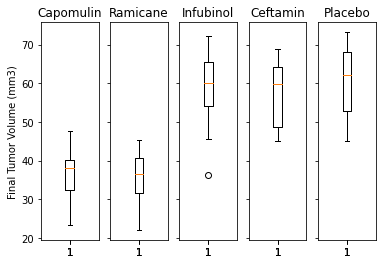

In [110]:
# generate a figure that will receive data for five separate axis
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, sharey = True,sharex = True)

# Specify a title, and plot each of the selected drug regimens
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capomulin_tumors, manage_ticks=False)
ax1.set_title("Capomulin")

ax2.boxplot(ramicane_tumors)
ax2.set_title("Ramicane")

ax3.boxplot(infubinol_tumors)
ax3.set_title("Infubinol")

ax4.boxplot(ceftamin_tumors)
ax4.set_title("Ceftamin")

ax5.boxplot(placebo_tumors)
ax5.set_title("Placebo")

## **Individual Tumor Response to the Capomulin Drug Treatment**

### **Data Analysis**
#### Select tumor volume data, all timepoints, all mice, grouped by drug treatment regimen

In [111]:
mousetimedata = (cleandata.copy().groupby(["Drug Regimen","Mouse ID", "Time (days)"])
                 .agg({"Tumor Volume (mm3)":"first"})
                 .unstack()# Separate drug regimens into separate columns
                ) 

#### Select a single mouse from the capomulin treatment

In [112]:
capomulinmice = mousetimedata.T["Capomulin"]
singlemouse = capomulinmice.copy().iloc[:,0].to_frame().droplevel(0,0)

### **Data Visualization**

<AxesSubplot:title={'center':'Case Study: b128, Capomulin Treatment Regimen'}, xlabel='Time (days)', ylabel='Tumor Volume (mm3)'>

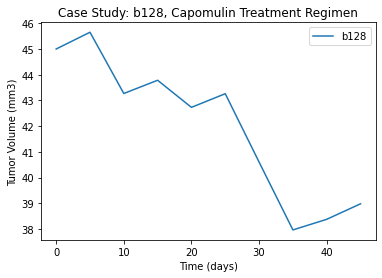

In [113]:
# Plot the entire dataframe with pandas
singlemouse.plot(kind ="line",title = "Case Study: b128, Capomulin Treatment Regimen",ylabel = "Tumor Volume (mm3)")

## **Determination of Average Tumor Density**
### **Data Analysis**

#### Collect average tumor volume for each mouse in the capomulin drug regimen

In [114]:
capomulintumors = (cleandata.copy().groupby(["Drug Regimen","Mouse ID"]) # group data by drug regimen and mouse ID
                   .agg({"Tumor Volume (mm3)":"mean","Weight (g)":'first'}) # return mouse weight and average tumor volume
                   .T["Capomulin"].T # Select data from the capomulin drug regimen only
                  .rename(columns = {"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})) # label column to represent new meaning

test = cleandata.copy().groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

### **Data Visualization**

#### Prepare data for plotting

In [115]:
# separate data columns into variables for plotting
xaxis = capomulintumors["Average Tumor Volume (mm3)"]
yaxis = capomulintumors["Weight (g)"]

# perform linear regression on average tumor volume and mouse weight, prepare variables to receive this information
(m,b,rvalue,pvalue,stderr) = st.linregress(xaxis,yaxis)

# create  variable to plot linear regression data 
linearfit = m * xaxis + b

# check for correlation between mouse weight and average tumor volume
densitycorrelation = st.pearsonr(capomulintumors['Average Tumor Volume (mm3)'],
                                 capomulintumors["Weight (g)"])

#### Generate a scatter plot using pandas, plot the linear regression line on top of this data

There is a strong correlation of 0.84 between these values
Y = 0.74x + -10.15


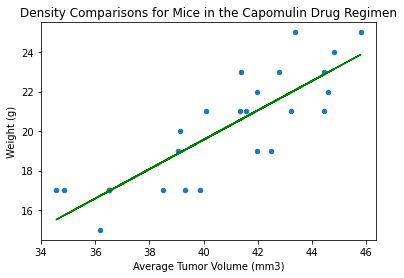

In [116]:
(capomulintumors.plot.scatter('Average Tumor Volume (mm3)',"Weight (g)", #plot command for the tumor data scatter plot
                              title = "Density Comparisons for Mice in the Capomulin Drug Regimen")
 .plot(xaxis,linearfit,"green") # plot command for the linear regression variable line plot
)

#output calculated results along with the table
print(f'There is a strong correlation of {round(densitycorrelation[0],2)} between these values')
print(f'Y = {round(m,2)}x + {round(b,2)}')